In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


file_path = "Health_Insurance_SET_2.xlsx"

import os

if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")


ins_df = pd.read_excel(file_path)# Reading the dataset from an Excel file using pandas 
ins_df1 = ins_df.copy() #Creating a copy of the original DataFrame to preserve the original data 
ins_df.head() #Displaying the first few rows of the DataFrame


File exists


,Age,Sex,BMI,children,Smoker,Region,Monthly_Income,Yearly_Income,Charges
0,19.0,female,27.900,0,yes,southwest,5094,61128,16884.92400
1,18.0,male,33.770,1,no,southeast,5094,61128,1725.55230
2,28.0,male,33.000,3,no,southeast,10780,129360,4449.46200
3,33.0,male,22.705,0,no,northwest,10780,129360,21984.47061
4,32.0,male,28.880,0,no,northwest,10780,129360,3866.85520


In [2]:
ins_df1[['Age', 'BMI', 'Smoker', 'Sex', 'children', 'Region', 'Charges']]


,Age,BMI,Smoker,Sex,children,Region,Charges
0,19.000000,27.900000,yes,female,0,southwest,16884.924000
1,18.000000,33.770000,no,male,1,southeast,1725.552300
2,28.000000,33.000000,no,male,3,southeast,4449.462000
3,33.000000,22.705000,no,male,0,northwest,21984.470610
4,32.000000,28.880000,no,male,0,northwest,3866.855200
...,...,...,...,...,...,...,...
4963,48.820767,41.426984,no,female,4,northwest,10987.324964
4964,38.661977,26.202557,no,female,2,southeast,11735.844352
4965,56.000000,40.300000,no,male,0,southwest,10602.385000
4966,48.061207,34.930624,no,female,1,southeast,8976.140452


In [3]:
ins_df1.info()# Displaying information about the 'ins_df1' DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4968 non-null   float64
 1   Sex             4968 non-null   object 
 2   BMI             4968 non-null   float64
 3   children        4968 non-null   int64  
 4   Smoker          4968 non-null   object 
 5   Region          4968 non-null   object 
 6   Monthly_Income  4968 non-null   int64  
 7   Yearly_Income   4968 non-null   int64  
 8   Charges         4968 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 349.4+ KB


In [4]:
#Checking the count of duplicate records and removal of duplicate records
ins_df1.duplicated().sum()
ins_df1.drop_duplicates(inplace = True)
ins_df1.duplicated().sum()

0

In [12]:
#Converting the categorical data to numeric value using label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ins_df1.iloc[:,4] = labelencoder.fit_transform(ins_df1.iloc[:,4])
ins_df1['Smoker'] = ins_df1['Smoker'].replace({"yes":1,"no":0})
ins_df1['Sex'] = ins_df1['Sex'].replace({"male":1,"female":0})

# Define labelencoder_region before using it
labelencoder_region = LabelEncoder()
ins_df1['Region'] = labelencoder_region.fit_transform(ins_df1['Region'])
ins_df1.head()


,Age,Sex,BMI,children,Smoker,Region,Monthly_Income,Yearly_Income,Charges
0,19.0,0,27.900,0,1,3,5094,61128,16884.92400
1,18.0,1,33.770,1,0,2,5094,61128,1725.55230
2,28.0,1,33.000,3,0,2,10780,129360,4449.46200
3,33.0,1,22.705,0,0,1,10780,129360,21984.47061
4,32.0,1,28.880,0,0,1,10780,129360,3866.85520


In [6]:
ins_df1[['Age', 'BMI', 'Smoker', 'Sex', 'children', 'Region', 'Charges']]


,Age,BMI,Smoker,Sex,children,Region,Charges
0,19.000000,27.900000,1,0,0,3,16884.924000
1,18.000000,33.770000,0,1,1,2,1725.552300
2,28.000000,33.000000,0,1,3,2,4449.462000
3,33.000000,22.705000,0,1,0,1,21984.470610
4,32.000000,28.880000,0,1,0,1,3866.855200
...,...,...,...,...,...,...,...
4282,42.310654,36.553482,1,1,3,2,42284.918414
4285,43.000000,35.531966,1,1,2,2,18989.365540
4286,31.374148,28.278549,0,1,4,0,21806.181609
4287,50.370750,26.766297,0,0,4,1,11355.817586


In [7]:
#Converting the categorical data to numeric value using label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ins_df1.iloc[:,4] = labelencoder.fit_transform(ins_df1.iloc[:,4])
ins_df1['Smoker'] = ins_df1['Smoker'].replace({"yes":1,"no":0})
ins_df1['Sex'] = ins_df1['Sex'].replace({"male":1,"female":0})

# Define labelencoder_region before using it
labelencoder_region = LabelEncoder()
ins_df1['Region'] = labelencoder_region.fit_transform(ins_df1['Region'])
ins_df1.head()


,Age,Sex,BMI,children,Smoker,Region,Monthly_Income,Yearly_Income,Charges
0,19.0,0,27.900,0,1,3,5094,61128,16884.92400
1,18.0,1,33.770,1,0,2,5094,61128,1725.55230
2,28.0,1,33.000,3,0,2,10780,129360,4449.46200
3,33.0,1,22.705,0,0,1,10780,129360,21984.47061
4,32.0,1,28.880,0,0,1,10780,129360,3866.85520


In [8]:
#Describing the dataset by statistical measure for each column.Comparing mean and median for outliers. 
ins_df1.describe()

,Age,Sex,BMI,children,Smoker,Region,Monthly_Income,Yearly_Income,Charges
count,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.00000,3188.000000,3188.000000,3188.000000
mean,39.001350,0.557716,30.631605,2.398996,0.157779,1.51788,10847.747804,130172.973651,12872.373081
std,12.322273,0.496736,5.456925,1.714890,0.364591,1.09796,2777.673356,33332.080272,10831.793302
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.00000,5094.000000,61128.000000,1121.873900
25%,28.991731,0.000000,26.700000,1.000000,0.000000,1.00000,10365.000000,124380.000000,5632.649768
50%,39.323837,1.000000,30.219229,2.000000,0.000000,2.00000,10780.000000,129360.000000,9518.182560
75%,48.766858,1.000000,34.100000,4.000000,0.000000,2.00000,11932.000000,143184.000000,14940.674853
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.00000,13777.000000,165324.000000,63770.428010


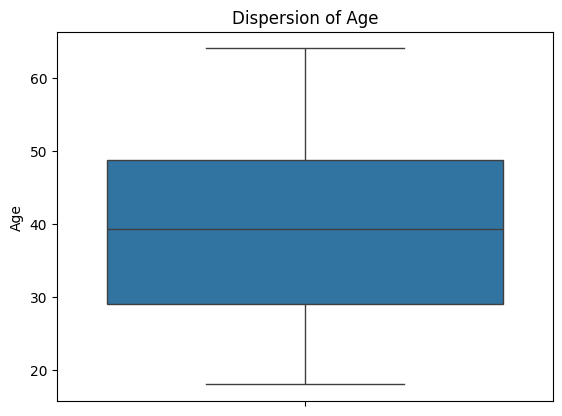

In [9]:
# Checking for outliers in the age column.
ax = sns.boxplot(ins_df1['Age'])
ax.set_title('Dispersion of Age')
plt.show(ax)

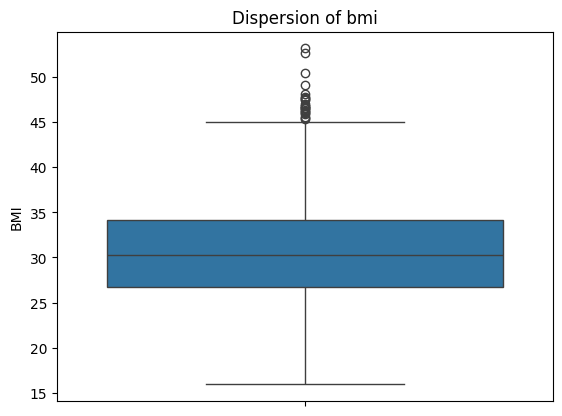

In [10]:
'''To ensure there are no outliers for bmi by box plot. 
But, there are few bmi values above 47 
which can be considered as outliers'''
ax = sns.boxplot(ins_df1['BMI'])
ax.set_title("Dispersion of bmi")
plt.show(ax)

KeyError: 'Children'

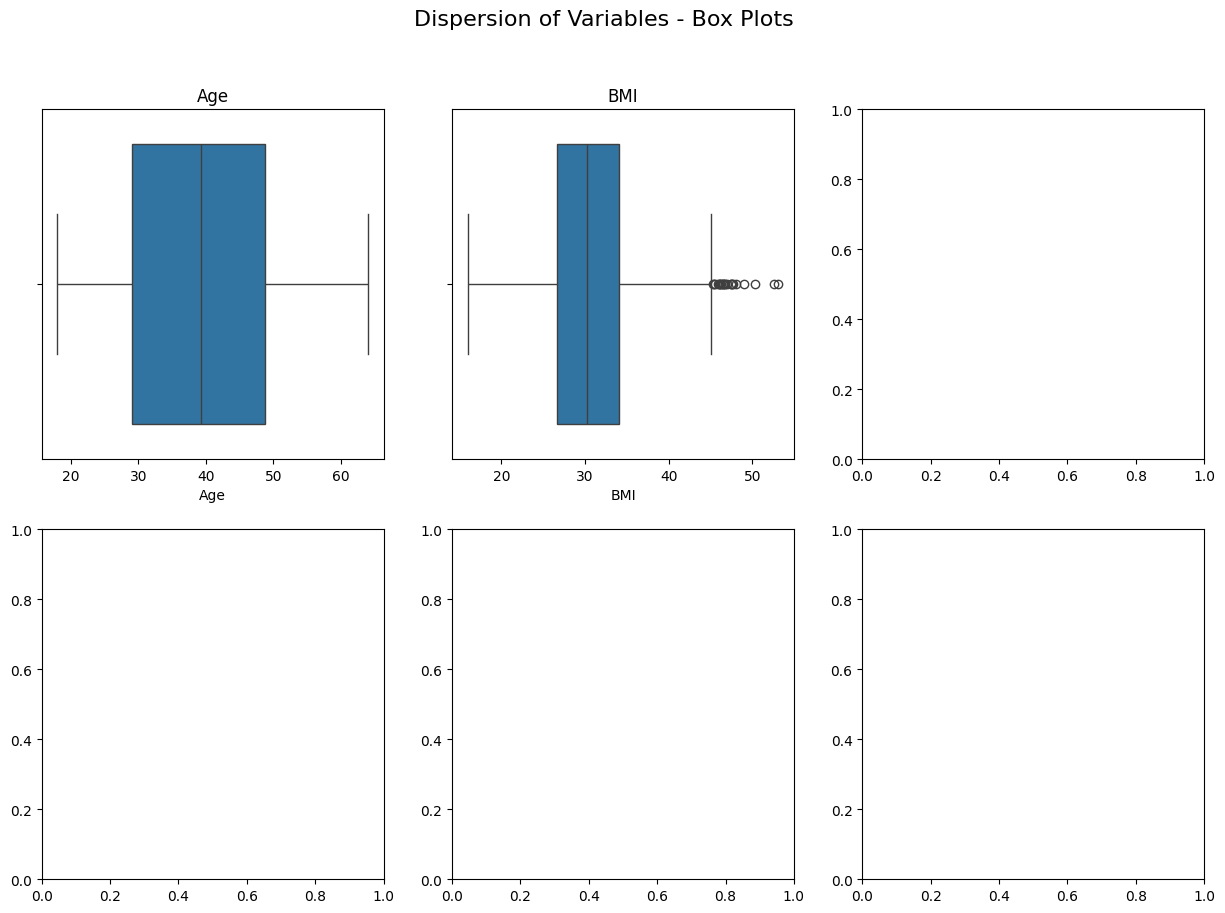

In [11]:
# Checking for outliers in the age column.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Dispersion of Variables - Box Plots', fontsize=16)

# Plotting box plots for each variable
sns.boxplot(ax=axes[0, 0], x=ins_df1['Age'])
axes[0, 0].set_title('Age')

sns.boxplot(ax=axes[0, 1], x=ins_df1['BMI'])
axes[0, 1].set_title('BMI')

sns.boxplot(ax=axes[0, 2], x=ins_df1['Children'])
axes[0, 2].set_title('children')

sns.boxplot(ax=axes[1, 0], x=ins_df1['Smoker'])
axes[1, 0].set_title('Smoker')

sns.boxplot(ax=axes[1, 1], x=ins_df1['Monthly_Income'])
axes[1, 1].set_title('Monthly Income')

sns.boxplot(ax=axes[1, 2], x=ins_df1['Yearly_Income'])
axes[1, 2].set_title('Yearly Income')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


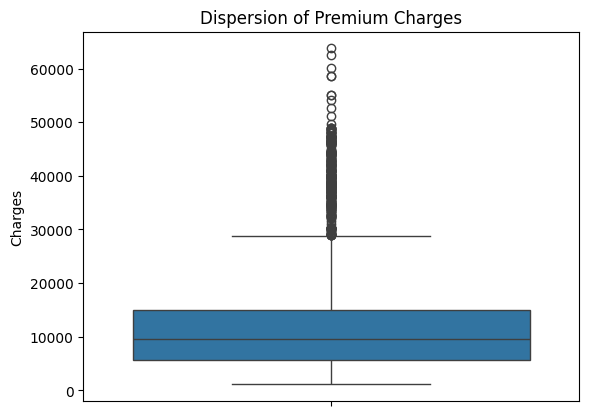

In [13]:
ax = sns.boxplot(ins_df1['Charges'])
ax.set_title("Dispersion of Premium Charges")
plt.show(ax)

In [16]:
#To understand the relationship of each independent variable with dependent variable.
ins_df1.corr()

,Age,Sex,BMI,children,Smoker,Region,Monthly_Income,Yearly_Income,Charges
Age,1.000000,-0.134591,0.132734,-0.048691,0.016107,-0.081445,0.572422,0.572422,0.297099
Sex,-0.134591,1.000000,0.013260,0.146081,0.078777,0.028311,-0.046130,-0.046130,0.086314
BMI,0.132734,0.013260,1.000000,-0.023352,0.038865,0.020919,0.003645,0.003645,0.203138
children,-0.048691,0.146081,-0.023352,1.000000,-0.171480,0.119028,0.167757,0.167757,-0.070529
Smoker,0.016107,0.078777,0.038865,-0.171480,1.000000,-0.052904,-0.013106,-0.013106,0.772358
Region,-0.081445,0.028311,0.020919,0.119028,-0.052904,1.000000,-0.085818,-0.085818,-0.117245
Monthly_Income,0.572422,-0.046130,0.003645,0.167757,-0.013106,-0.085818,1.000000,1.000000,0.136354
Yearly_Income,0.572422,-0.046130,0.003645,0.167757,-0.013106,-0.085818,1.000000,1.000000,0.136354
Charges,0.297099,0.086314,0.203138,-0.070529,0.772358,-0.117245,0.136354,0.136354,1.000000


In [ ]:
ins_df1[['Age', 'BMI', 'Smoker', 'Sex', 'children', 'Region', 'Charges']].corr()


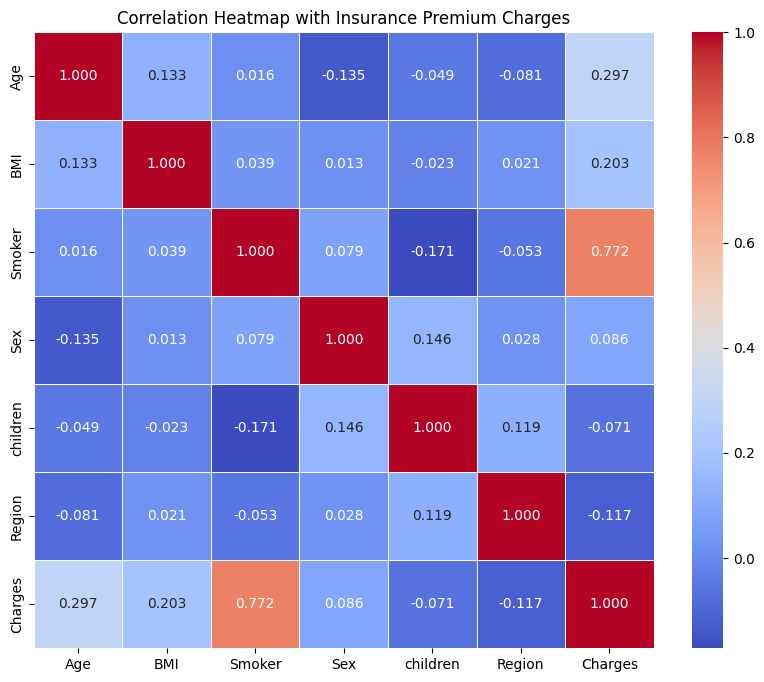

In [17]:
independent_variables = ['Age', 'BMI', 'Smoker', 'Sex', 'children', 'Region']
# Creating a correlation matrix for all variables
correlation_matrix = ins_df1[['Age', 'BMI', 'Smoker', 'Sex', 'children', 'Region', 'Charges']].corr()

# Creating a heatmap with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Correlation Heatmap with Insurance Premium Charges')
plt.show()


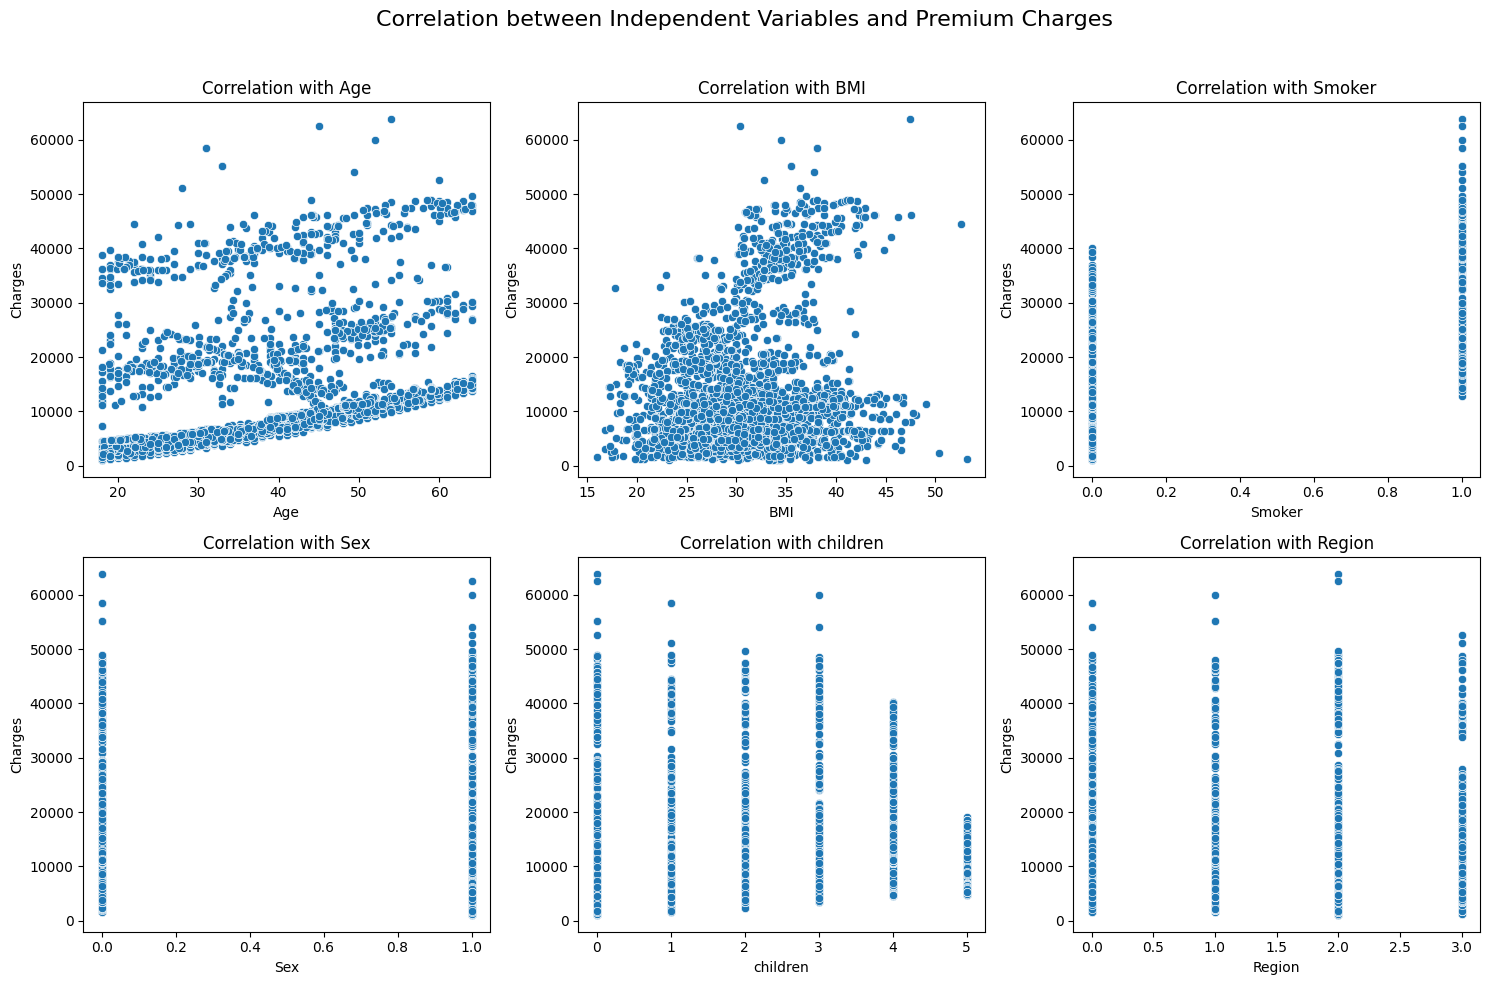

In [18]:
# Extracting independent variables and insurance premium charges
independent_variables = ['Age', 'BMI', 'Smoker', 'Sex', 'children', 'Region']
dependent_variable = 'Charges'

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Correlation between Independent Variables and Premium Charges', fontsize=16)

# Plotting correlations for each variable
for i, var in enumerate(independent_variables):
    row, col = divmod(i, 3)
    sns.scatterplot(x=var, y=dependent_variable, data=ins_df1, ax=axes[row, col])
    axes[row, col].set_title(f'Correlation with {var}')

# Adjusting the layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


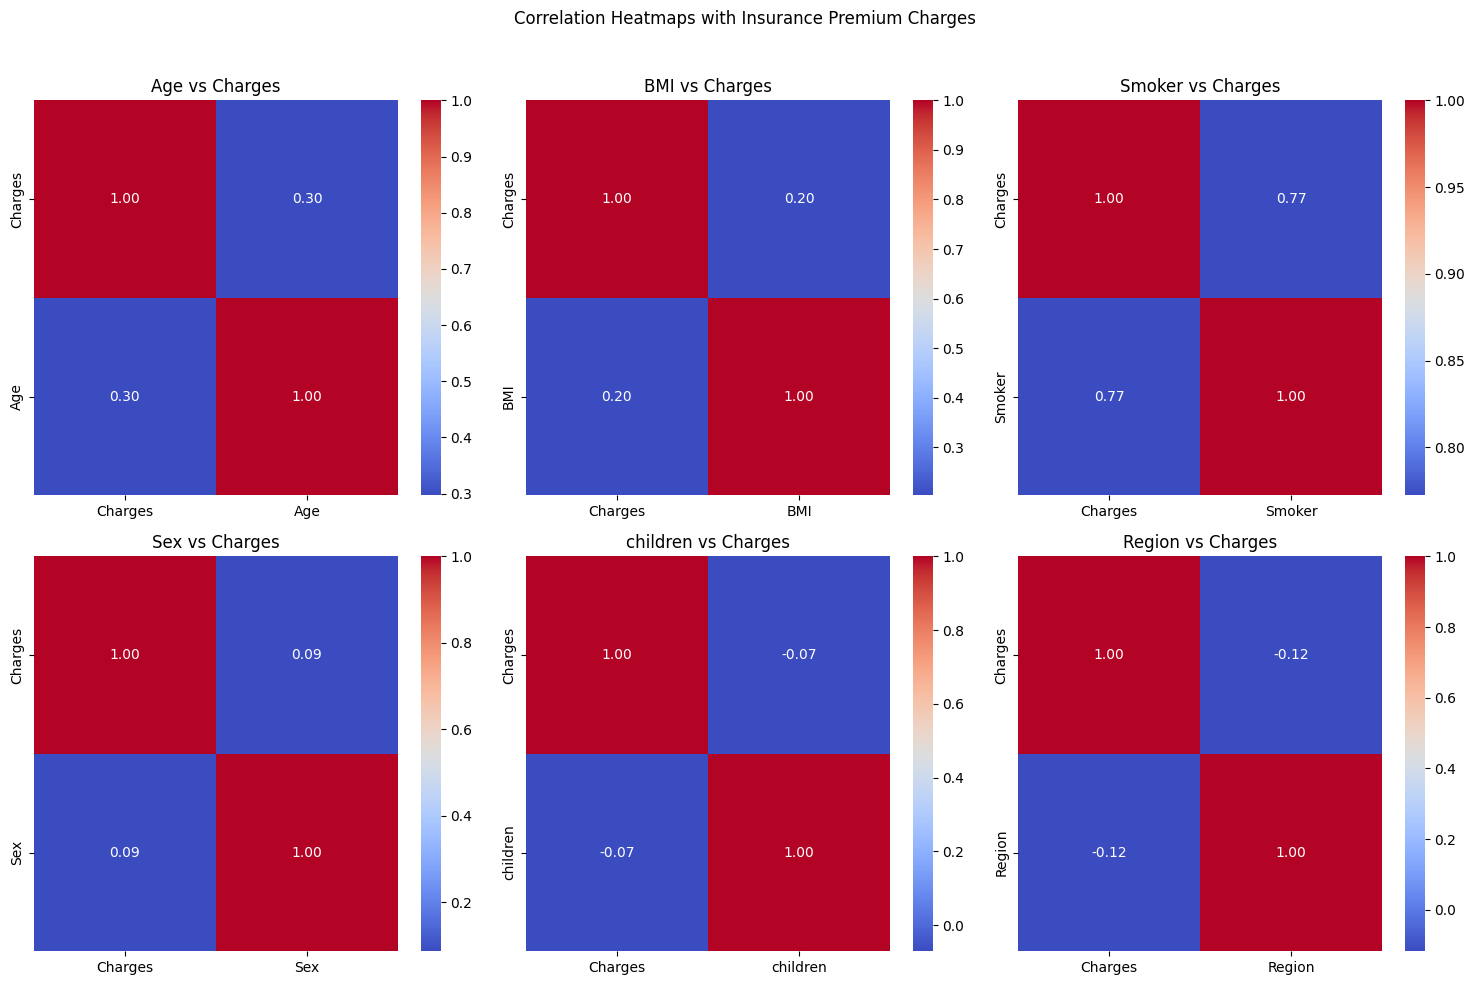

In [19]:
independent_variables = ['Age', 'BMI', 'Smoker', 'Sex', 'children', 'Region']

# Creating subplots for heatmaps
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Correlation Heatmaps with Insurance Premium Charges')

# Plotting the heatmap of correlation of every variable with Charges
for i, var in enumerate(independent_variables):
    row, col = i // 3, i % 3
    correlation_matrix = ins_df1[['Charges', var]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs Charges')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


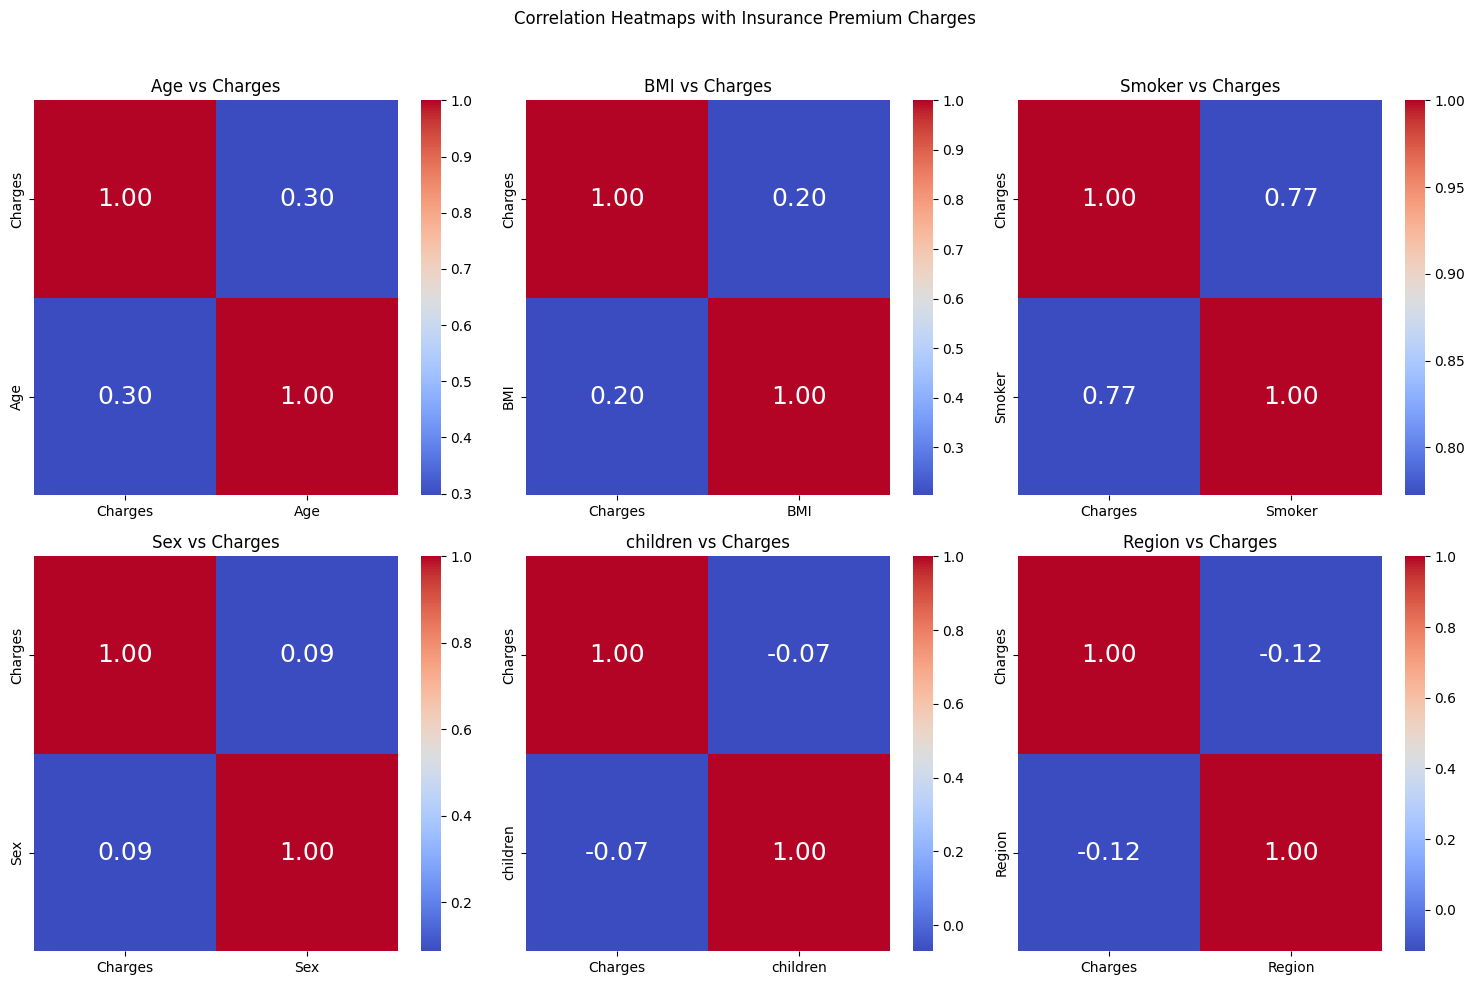

In [44]:
import seaborn as sns

# Define font size
font_size = 12

# Creating subplots for heatmaps
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Correlation Heatmaps with Insurance Premium Charges')

# Plotting the heatmap of correlation of every variable with Charges
for i, var in enumerate(independent_variables):
    row, col = i // 3, i % 3
    correlation_matrix = ins_df1[['Charges', var]].corr()
    
    # Set annot_kws to adjust font size
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[row, col], annot_kws={"size": 18})
    
    axes[row, col].set_title(f'{var} vs Charges')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
#These three features have strong relationship with expenses.
x = ins_df1[['Age','BMI','Smoker']]
y = ins_df1['Charges']

#test size data set should be 30% data
X_train,X_test,Y_train, Y_test = train_test_split(x,y,test_size=0.3,
                                                  random_state=42)

#Creating a linear regression model object
model = LinearRegression()

#Training the model using training data set
model.fit(X_train, Y_train) 
X_train_predict = model.predict(X_train)
X_test_predict = model.predict(X_test)

In [25]:
print("Intercept value:", model.intercept_)
print("Coefficient values:", model.coef_)

Intercept value: -8140.273581421539
Coefficient values: [  229.81100699   277.66765885 22579.04200689]


In [ ]:
coef_df = pd.DataFrame(list(zip(X_train.columns,model.coef_)), columns = ['Features','Predicted Coeff'])
coef_df

In [26]:
#Predicting the Y value from the train set and test set.
Y_train_predict = model.predict(X_train)
Y_train_predict[0:5]

Y_test_predict = model.predict(X_test)

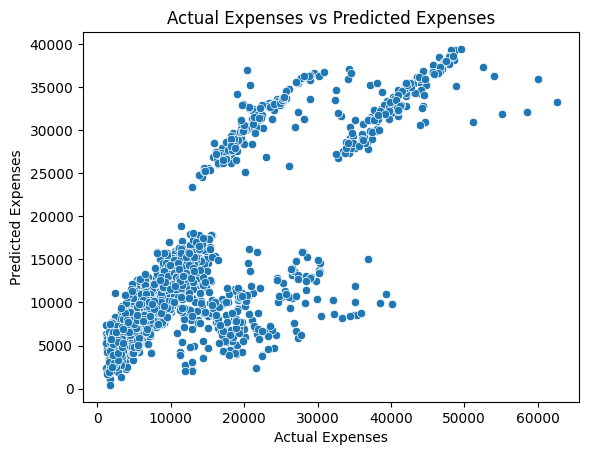

In [27]:
# Plot to see the actual expenses and predicted expenses from Train data set
ax = sns.scatterplot(x=Y_train, y=Y_train_predict)
ax.set_title("Actual Expenses vs Predicted Expenses")
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.show(ax)


In [28]:
#Train and predict the Y_train for the feature 'smoker'
smoker_model = LinearRegression()
smoker_model.fit(X_train[['Smoker']], Y_train)
print("intercept:",smoker_model.intercept_, "coeff:", smoker_model.coef_)

#print("Train - Mean squared error:", np.mean((Y_train - model.predict(X_train)) ** 2))
smoker_df = pd.DataFrame(list(zip(Y_train, smoker_model.predict(X_train[['Smoker']]))), columns = ['Actual Expenses','Predicted Expenses'])
smoker_df.head()
#X_train['smoker'].shape

intercept: 9253.096824243501 coeff: [22802.4416651]


,Actual Expenses,Predicted Expenses
0,17085.267600,32055.538489
1,16450.894700,32055.538489
2,16570.599600,9253.096824
3,1639.563100,9253.096824
4,23261.020865,9253.096824


In [29]:
# Taking user input for Age, BMI, and Smoker
user_age = float(input("Enter Age: "))
user_bmi = float(input("Enter BMI: "))
user_smoker = int(input("Enter Smoker (0 for no, 1 for yes): "))

# Create a DataFrame with user input
user_input = pd.DataFrame({'Age': [user_age], 'BMI': [user_bmi], 'Smoker': [user_smoker]})

# Use the trained model to predict the premium charges for the user
predicted_charges = model.predict(user_input)

# Display the predicted premium (charges)
print(f"Predicted Premium (Charges): {predicted_charges[0]:.2f}")


Enter Age: 34
Enter BMI: 22
Enter Smoker (0 for no, 1 for yes): 1
Predicted Premium (Charges): 28361.03


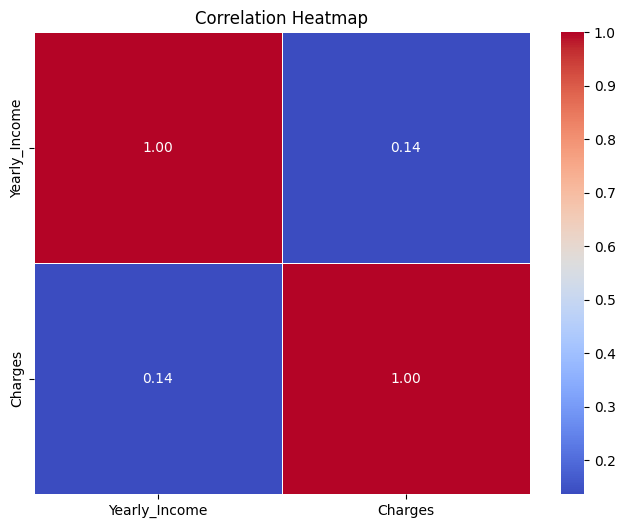

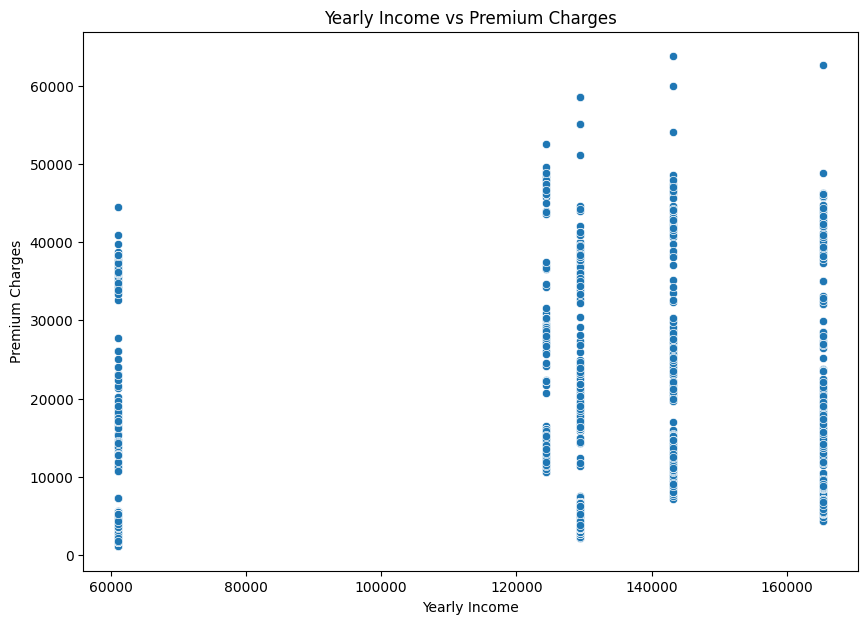

In [30]:

# Check the correlation between 'yearly_income' and 'Charges'
correlation = ins_df1[['Yearly_Income', 'Charges']].corr()

# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot to visualize the relationship between 'yearly_income' and 'Charges'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Yearly_Income', y='Charges', data=ins_df1)
plt.title('Yearly Income vs Premium Charges')
plt.xlabel('Yearly Income')
plt.ylabel('Premium Charges')
plt.show()


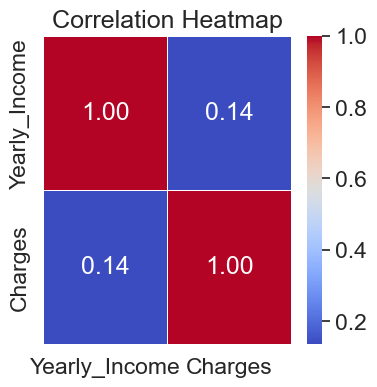

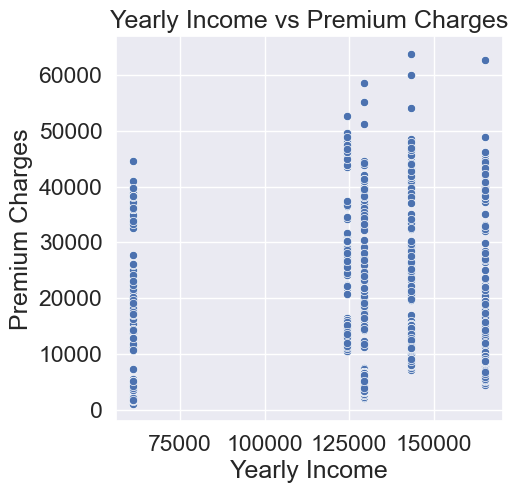

In [55]:
# Check the correlation between 'yearly_income' and 'Charges'
correlation = ins_df1[['Yearly_Income', 'Charges']].corr()

# Set the font size for the heatmap
sns.set(font_scale=1.5)

# Visualize the correlation using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot to visualize the relationship between 'yearly_income' and 'Charges'
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Yearly_Income', y='Charges', data=ins_df1)
plt.title('Yearly Income vs Premium Charges')
plt.xlabel('Yearly Income')
plt.ylabel('Premium Charges')
plt.show()


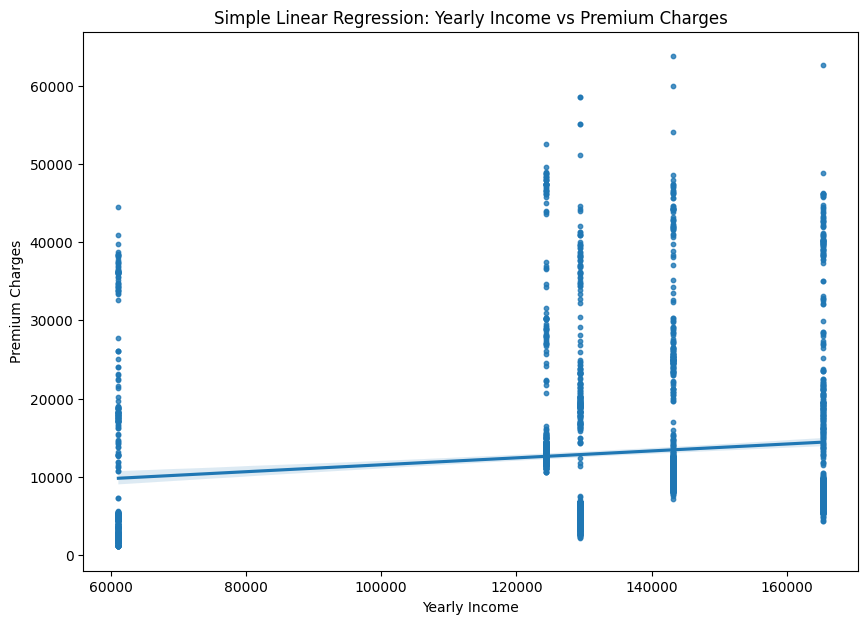

In [31]:
# Simple Linear Regression Plot for 'Yearly_Income' and 'Charges'
plt.figure(figsize=(10, 7))
sns.regplot(x='Yearly_Income', y='Charges', data=ins_df1, scatter_kws={'s': 10})
plt.title('Simple Linear Regression: Yearly Income vs Premium Charges')
plt.xlabel('Yearly Income')
plt.ylabel('Premium Charges')
plt.show()


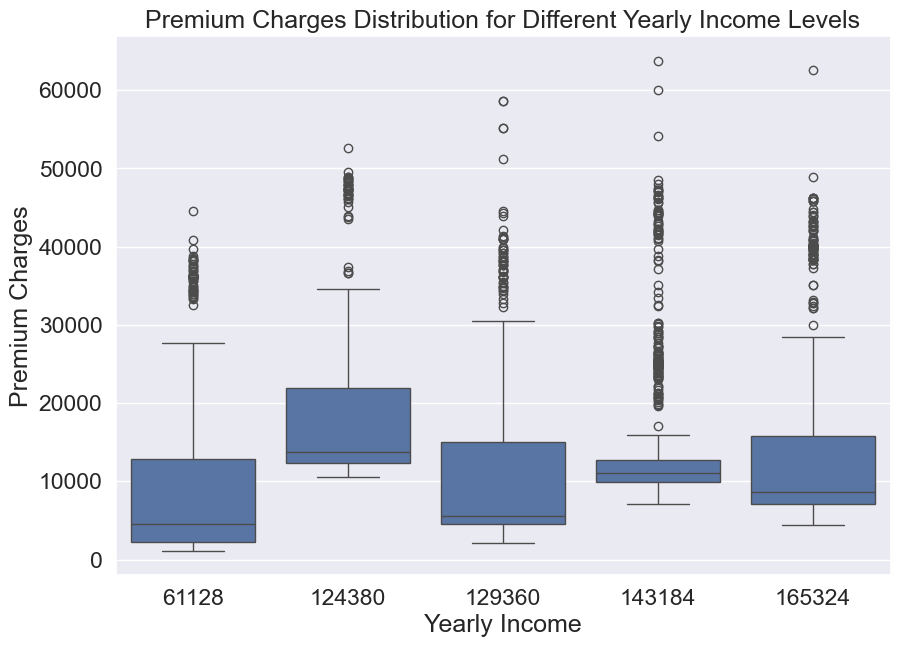

In [46]:
# Box plot to visualize the distribution of premium charges for different levels of yearly income
plt.figure(figsize=(10, 7))
sns.boxplot(x='Yearly_Income', y='Charges', data=ins_df1)
plt.title('Premium Charges Distribution for Different Yearly Income Levels')
plt.xlabel('Yearly Income')
plt.ylabel('Premium Charges')
plt.show()


In [48]:
# Features: Age, BMI, and Smoker
features = ['Age', 'BMI', 'Smoker']

# Extracting the selected features and the target variable
X_multi = ins_df1[features]
Y_multi = ins_df1['Charges']

# Splitting the data into training and testing sets
X_train_multi, X_test_multi, Y_train_multi, Y_test_multi = train_test_split(X_multi, 
                                                                            Y_multi, 
                                                                            test_size=0.3, 
                                                                            random_state=42)

# Creating a linear regression model
multi_feature_model = LinearRegression()

# Training the model using the training data set
multi_feature_model.fit(X_train_multi, Y_train_multi)

# Displaying the intercept and coefficients
print("Intercept value:", multi_feature_model.intercept_)
print("Coefficients:", multi_feature_model.coef_)

# Predicting Y values for the training set
Y_train_multi_predict = multi_feature_model.predict(X_train_multi)

# Creating a DataFrame to compare actual and predicted expenses
multi_feature_df = pd.DataFrame({'Actual Expenses': Y_train_multi, 'Predicted Expenses': Y_train_multi_predict})
multi_feature_df.head()


Intercept value: -8140.273581421539
Coefficients: [  229.81100699   277.66765885 22579.04200689]


,Actual Expenses,Predicted Expenses
261,17085.267600,26487.588529
1026,16450.894700,26032.866718
2189,16570.599600,10056.016355
195,1639.563100,4719.989236
3301,23261.020865,6250.546069


In [35]:
# Predicting Y values for the training set 
Y_train_multi_predict = multi_feature_model.predict(X_train_multi)

# Calculating the Root Mean Squared Error for the training set 
rmse_multi_train = np.sqrt(mean_squared_error(Y_train_multi, Y_train_multi_predict))

# Calculating the R-squared value for the training set 
r2_multi_train = r2_score(Y_train_multi, Y_train_multi_predict)

# Calculating the Mean Absolute Error for the training set 
mae_multi_train = mean_absolute_error(Y_train_multi, Y_train_multi_predict)

# Displaying the evaluation metrics for the training set 
print("Root Mean Squared Error (RMSE) for the Training Set :", rmse_multi_train)
print("R-squared value for the Training Set :", r2_multi_train)
print("Mean Absolute Error (MAE) for the Training Set :", mae_multi_train)


Root Mean Squared Error (RMSE) for the Training Set : 6001.383924675642
R-squared value for the Training Set : 0.6934119836509725
Mean Absolute Error (MAE) for the Training Set : 4071.89351321217


In [36]:
# Predicting Y values for the test set 
Y_test_multi_predict = multi_feature_model.predict(X_test_multi)

# Calculating the Root Mean Squared Error for the test set 
rmse_multi_test = np.sqrt(mean_squared_error(Y_test_multi, Y_test_multi_predict))

# Calculating the R-squared value for the test set 
r2_multi_test = r2_score(Y_test_multi, Y_test_multi_predict)

# Calculating the Mean Absolute Error for the test set 
mae_multi_test = mean_absolute_error(Y_test_multi, Y_test_multi_predict)

print("Root Mean Squared Error (RMSE) for the Test Set:", rmse_multi_test)
print("R-squared value for the Test Set:", r2_multi_test)
print("Mean Absolute Error (MAE) for the Test Set:", mae_multi_test)


Root Mean Squared Error (RMSE) for the Test Set: 5891.656497891931
R-squared value for the Test Set: 0.702934127289655
Mean Absolute Error (MAE) for the Test Set: 4061.6716528172597


In [49]:
# Arranging the error Data in a table
data = {
    'Metric': ['RMSE', 'R-squared', 'MAE'],
    'Training Set': [rmse_multi_train, r2_multi_train, mae_multi_train],
    'Test Set': [rmse_multi_test, r2_multi_test, mae_multi_test],
    'Difference': [rmse_multi_train - rmse_multi_test, r2_multi_train 
                   - r2_multi_test, mae_multi_train - mae_multi_test],
    'Percentage of Error': [
        ((rmse_multi_train - rmse_multi_test) / rmse_multi_train) * 100,
        ((r2_multi_train - r2_multi_test) / r2_multi_train) * 100,
        ((mae_multi_train - mae_multi_test) / mae_multi_train) * 100
    ]
}

# Creating a DataFrame
metrics_table = pd.DataFrame(data)

# Displaying the table
print(metrics_table)

      Metric  Training Set     Test Set  Difference  Percentage of Error
0       RMSE   6001.383925  5891.656498  109.727427             1.828369
1  R-squared      0.693412     0.702934   -0.009522            -1.373230
2        MAE   4071.893513  4061.671653   10.221860             0.251035


In [38]:
# Taking user input for the three directly correlated independent variables
user_age = float(input("Enter Age: "))
user_bmi = float(input("Enter BMI: "))
user_smoker = int(input("Enter Smoker (0 for no, 1 for yes): "))

# Create a DataFrame with user input
user_input = pd.DataFrame({'Age': [user_age], 'BMI': [user_bmi], 'Smoker': [user_smoker]})

# Use only Age, BMI, and Smoker for training
x_user = ins_df1[['Age', 'BMI', 'Smoker']]
y_user = ins_df1['Charges']

# Train the model using only Age, BMI, and Smoker
model_user = LinearRegression()
model_user.fit(x_user, y_user)

# Add the constant term to the user input
user_input = sm.add_constant(user_input)

# Use the trained model to predict the premium charges for the user
predicted_charges_user = model_user.predict(user_input)

# Display the predicted premium (charges)
print(f"Predicted Premium (Charges) for the user: {predicted_charges_user[0]:.2f}")

Enter Age: 34
Enter BMI: 22
Enter Smoker (0 for no, 1 for yes): 1
Predicted Premium (Charges) for the user: 28418.43


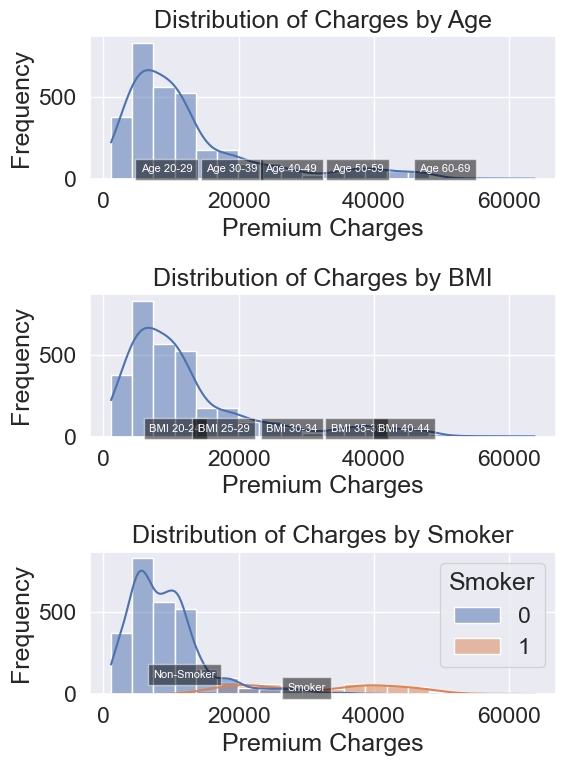

In [50]:
# Creating subplots for the distribution of premium charges by age, BMI, and smoker
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))

# Histogram for premium charges by age
sns.histplot(x='Charges', data=ins_df1, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Charges by Age')
axes[0].set_xlabel('Premium Charges')
axes[0].set_ylabel('Frequency')

# Annotate with age intervals
age_intervals = [ 20, 30, 40, 50, 60, 70]
for i in range(len(age_intervals) - 1):
    interval_label = f'Age {age_intervals[i]}-{age_intervals[i+1]-1}'
    interval_position = ins_df1.loc[(ins_df1['Age'] >= age_intervals[i]) 
                                    & (ins_df1['Age'] < age_intervals[i+1]), 'Charges'].mean()
    interval_position += i * 7000  
    axes[0].text(interval_position, 40, interval_label, fontsize=8, ha='center', 
                 color='white', bbox=dict(facecolor='black', alpha=0.5))

# Histogram for premium charges by BMI
sns.histplot(x='Charges', data=ins_df1, bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Charges by BMI')
axes[1].set_xlabel('Premium Charges')
axes[1].set_ylabel('Frequency')

# Annotate with BMI intervals
bmi_intervals = [ 20, 25, 30, 35, 40, 45]
for i in range(len(bmi_intervals) - 1):
    interval_label = f'BMI {bmi_intervals[i]}-{bmi_intervals[i+1]-1}'
    interval_position = ins_df1.loc[(ins_df1['BMI'] >= bmi_intervals[i]) 
                                    & (ins_df1['BMI'] < bmi_intervals[i+1]), 'Charges'].mean()
    interval_position += i * 7000  
    axes[1].text(interval_position, 30, interval_label, fontsize=8, ha='center',
                 color='white', bbox=dict(facecolor='black', alpha=0.5))

# Histogram for premium charges by smoker
sns.histplot(x='Charges', data=ins_df1, bins=20, kde=True, ax=axes[2], hue='Smoker')
axes[2].set_title('Distribution of Charges by Smoker')
axes[2].set_xlabel('Premium Charges')
axes[2].set_ylabel('Frequency')

# Annotate with smoker information
axes[2].text(12000, 100, 'Non-Smoker', fontsize=8, ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.5))
axes[2].text(30000, 20, 'Smoker', fontsize=8, ha='center', color='white', 
             bbox=dict(facecolor='black', alpha=0.5))

# Adjusting the layout for better readability
plt.tight_layout()
plt.show()


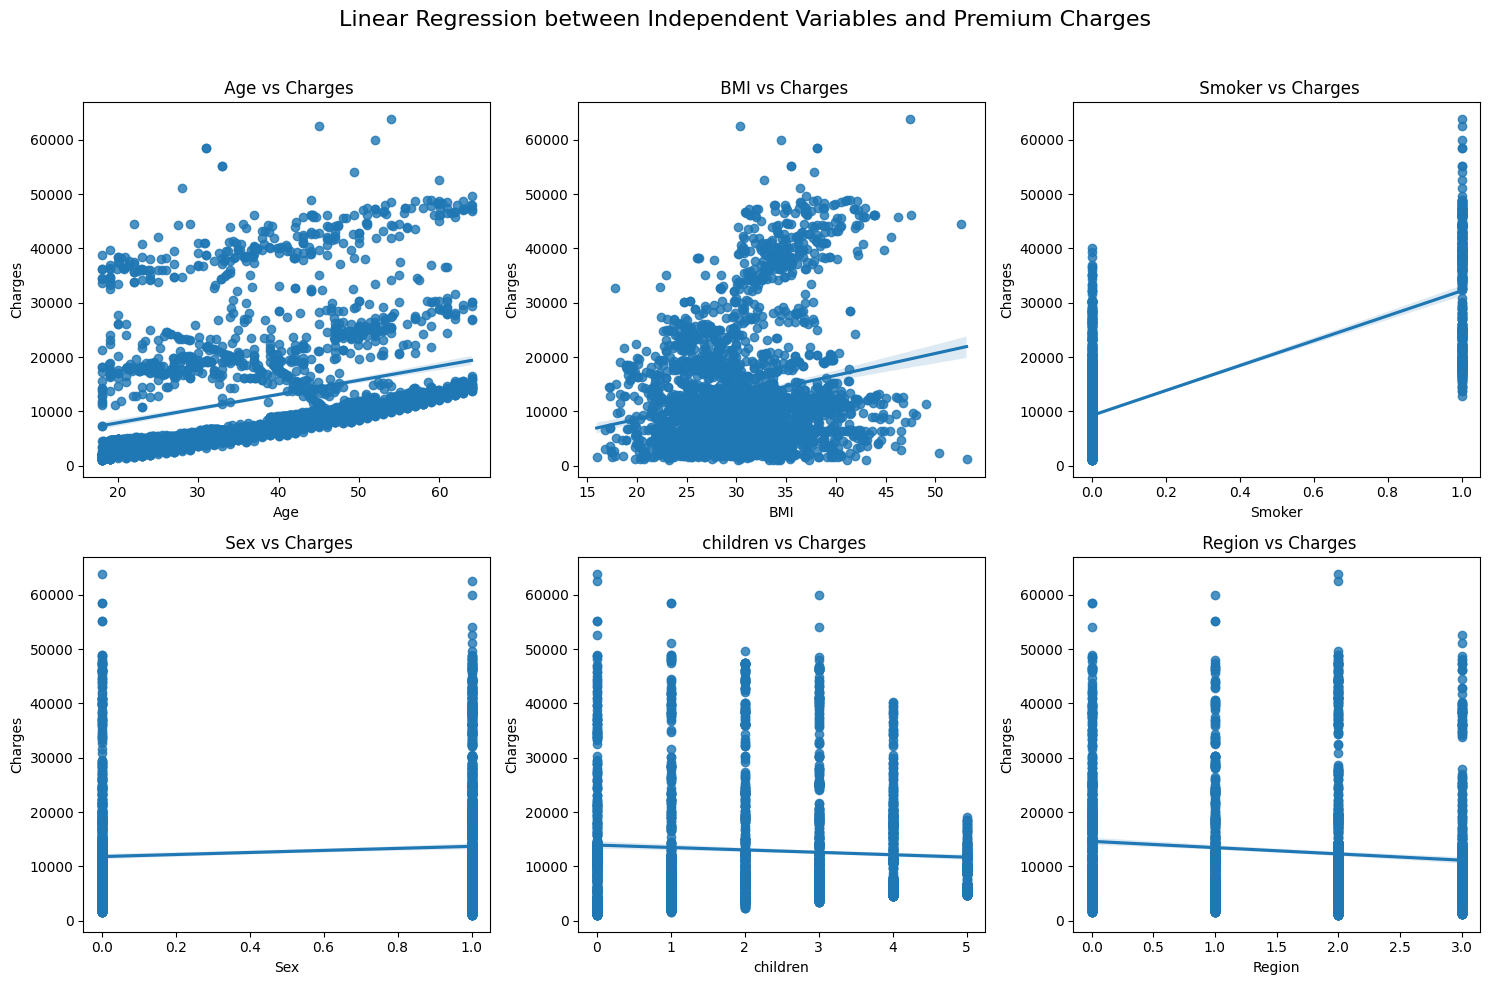

In [42]:
# Creating subplots for linear regression plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Linear Regression between Independent Variables and Premium Charges', fontsize=16)

# Plotting linear regression for each variable
for i, var in enumerate(independent_variables):
    row, col = divmod(i, 3)
    sns.regplot(x=var, y=dependent_variable, data=ins_df1, ax=axes[row, col])
    axes[row, col].set_title(f' {var} vs {dependent_variable}')

# Adjusting the layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


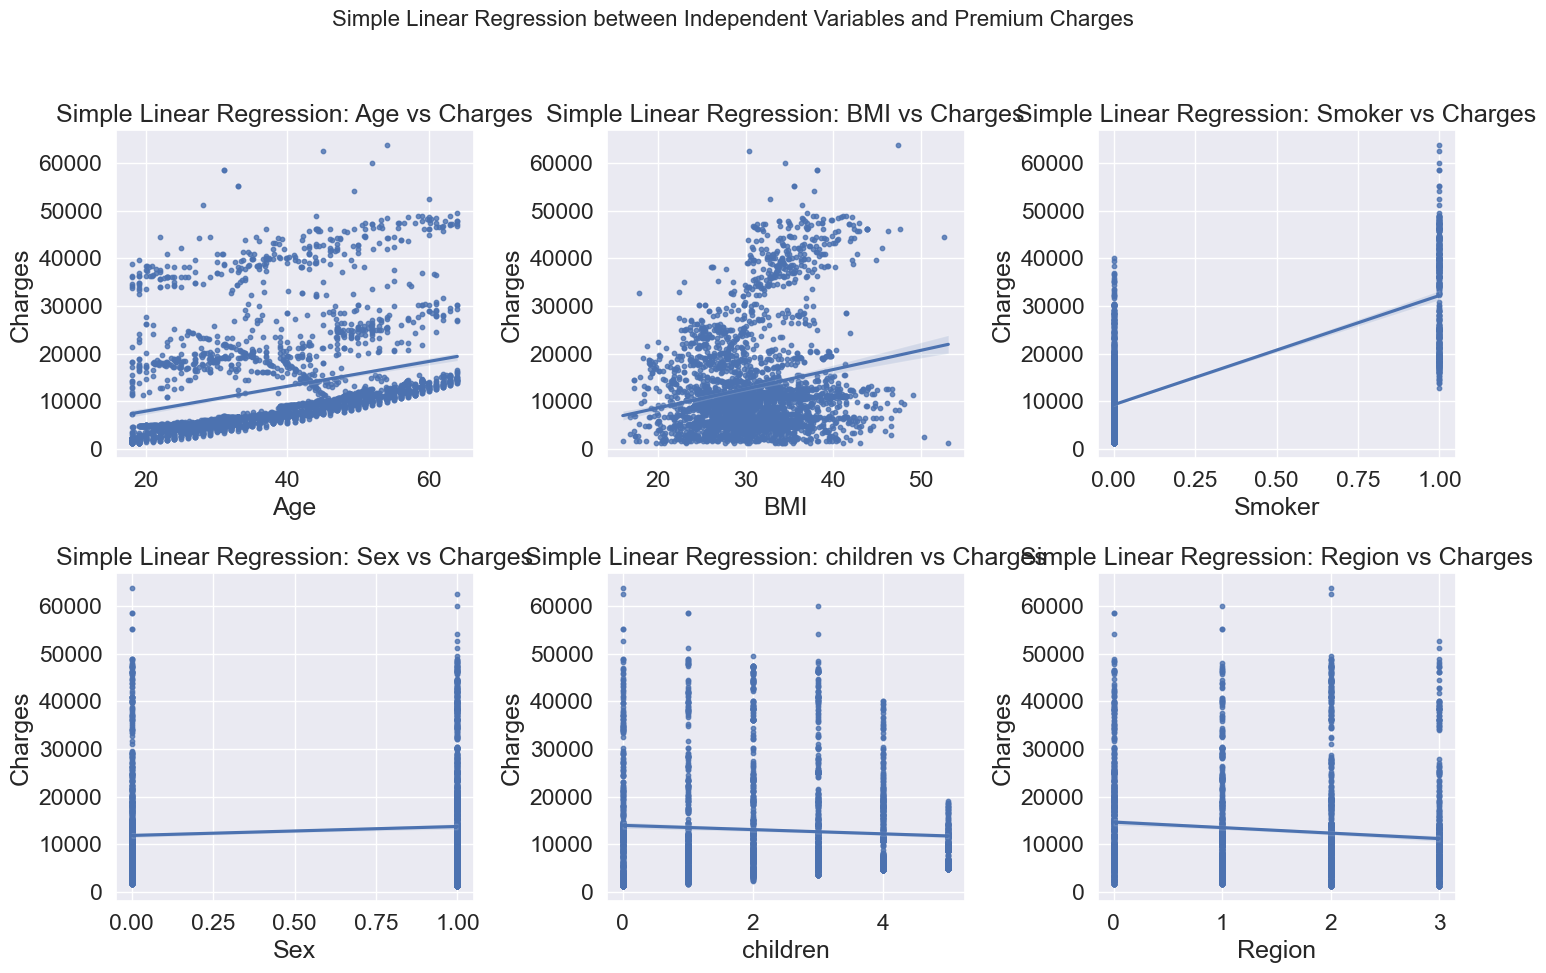

In [53]:
# Creating subplots for simple linear regression plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Simple Linear Regression between Independent Variables and Premium Charges', fontsize=16)

# Plotting simple linear regression for each variable
for i, var in enumerate(independent_variables):
    row, col = divmod(i, 3)
    sns.regplot(x=var, y=dependent_variable, data=ins_df1, ax=axes[row, col], scatter_kws={'s': 10})
    axes[row, col].set_title(f'Simple Linear Regression: {var} vs {dependent_variable}')

# Adjusting the layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
